
**1. Importing Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import sklearn
import scipy
import seaborn as sb
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
!pip3 install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**2. Importing the Dataset**

In [4]:
data=pd.read_csv("Dataset.csv")

**3. Analyse the data**

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,10651.000000,10660.000000,10570.000000,4258.000000,1968.000000,10518.000000,10626.000000,10630.000000,10511.000000,10507.000000,10495.000000,10491.000000,5554.000000,5757.000000,10645.000000,10643.000000
mean,11.699962,24.070891,2.342980,5.629544,7.700305,35.138239,11.098626,15.501693,68.658168,47.160084,1018.240057,1015.586951,4.214080,4.335765,16.871893,22.671192
std,6.250226,7.001711,9.586298,4.787872,3.770900,12.534175,7.513005,7.671613,20.212526,21.021973,6.817799,6.703757,3.081826,2.853925,6.111722,6.784572
min,-3.000000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,5.000000,1.000000,989.800000,982.900000,0.000000,0.000000,0.300000,6.400000
25%,6.700000,18.600000,0.000000,2.600000,5.100000,26.000000,6.000000,9.000000,55.000000,31.000000,1013.600000,1010.900000,1.000000,1.000000,12.300000,17.500000
50%,11.700000,23.600000,0.000000,4.400000,8.900000,33.000000,9.000000,15.000000,70.000000,46.000000,1018.200000,1015.600000,5.000000,5.000000,17.100000,22.000000
75%,16.700000,28.900000,0.400000,7.400000,10.500000,43.000000,17.000000,20.000000,84.000000,61.000000,1022.900000,1020.200000,7.000000,7.000000,21.200000,27.200000
max,29.700000,46.600000,371.000000,86.200000,13.800000,107.000000,48.000000,56.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,45.200000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10705 entries, 0 to 10704
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10705 non-null  object 
 1   Location       10705 non-null  object 
 2   MinTemp        10651 non-null  float64
 3   MaxTemp        10660 non-null  float64
 4   Rainfall       10570 non-null  float64
 5   Evaporation    4258 non-null   float64
 6   Sunshine       1968 non-null   float64
 7   WindGustDir    10518 non-null  object 
 8   WindGustSpeed  10518 non-null  float64
 9   WindDir9am     9681 non-null   object 
 10  WindDir3pm     10552 non-null  object 
 11  WindSpeed9am   10626 non-null  float64
 12  WindSpeed3pm   10630 non-null  float64
 13  Humidity9am    10511 non-null  float64
 14  Humidity3pm    10507 non-null  float64
 15  Pressure9am    10495 non-null  float64
 16  Pressure3pm    10491 non-null  float64
 17  Cloud9am       5554 non-null   float64
 18  Cloud3

**4. Handling Missing Values**

In [7]:
data.isnull().sum()

Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          135
Evaporation      6447
Sunshine         8737
WindGustDir       187
WindGustSpeed     187
WindDir9am       1024
WindDir3pm        153
WindSpeed9am       79
WindSpeed3pm       75
Humidity9am       194
Humidity3pm       198
Pressure9am       210
Pressure3pm       214
Cloud9am         5151
Cloud3pm         4948
Temp9am            60
Temp3pm            62
RainToday         135
RainTomorrow      136
dtype: int64

In [8]:
import missingno as msno

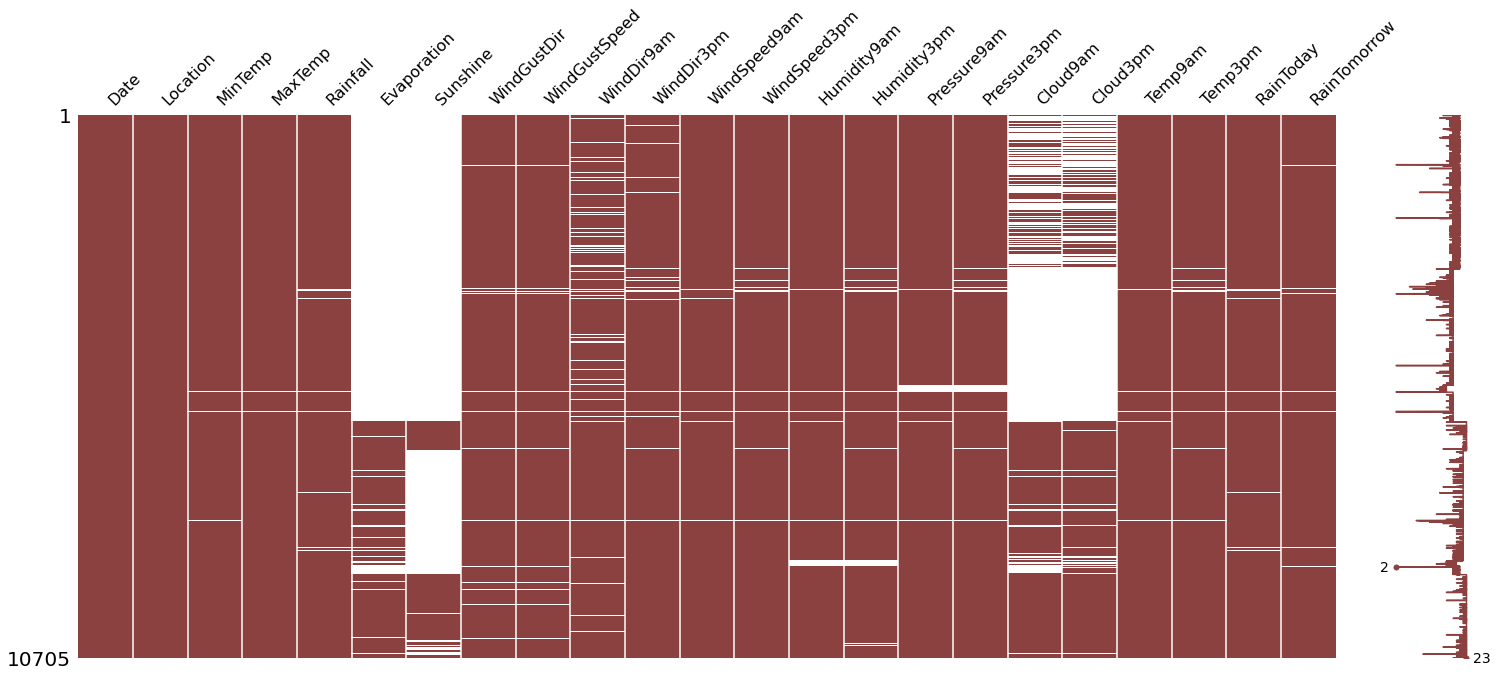

In [9]:
msno.matrix(data,color=(0.55,0.255,0.255),fontsize=16)



> Imputing Data



In [10]:
data_c=data[["RainToday","WindGustDir","WindDir9am","WindDir3pm"]]

In [11]:
data.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
data.drop(columns=["RainToday","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)

In [12]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [13]:
c_names=data_c.columns

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [16]:
data_c=imp_mode.fit_transform(data_c)

In [17]:
data_c=pd.DataFrame(data_c,columns=c_names)

In [18]:
data_c.tail()

,RainToday,WindGustDir,WindDir9am,WindDir3pm
10700,No,NNE,N,NE
10701,No,SSW,SSW,SE
10702,No,NNE,NNW,NE
10703,No,NNW,NNW,NNE
10704,N,SE,S,NE


In [19]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Delhi,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,2008-12-02,Delhi,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,2008-12-03,Delhi,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,2008-12-04,Delhi,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,2008-12-05,Delhi,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


In [20]:
data=pd.concat([data,data_c],axis=1)

In [21]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,2008-12-01,Delhi,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,W,W,WNW
1,2008-12-02,Delhi,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,WNW,NNW,WSW
2,2008-12-03,Delhi,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,WSW,W,WSW
3,2008-12-04,Delhi,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,NE,SE,E
4,2008-12-05,Delhi,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,W,ENE,NW


**5. Data Visualization**



> Data Correlation



In [22]:
corr=data.corr()



> Heat-Map



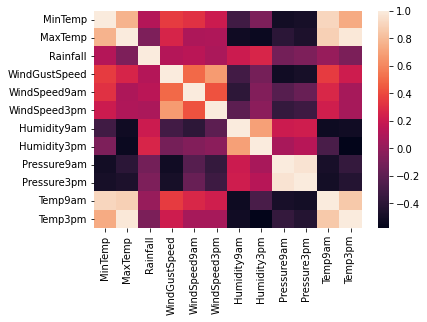

In [23]:
sb.heatmap(data=corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)



> Pair Plot



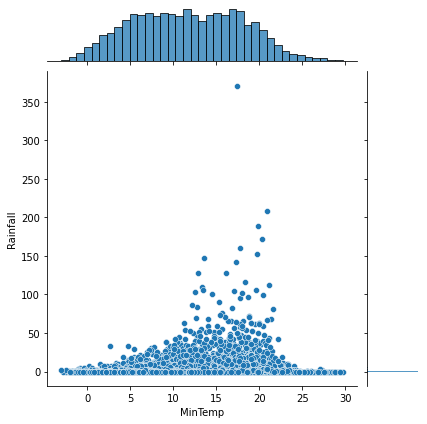

In [24]:
sb.jointplot(data["MinTemp"],data['Rainfall'])



> Box Plot



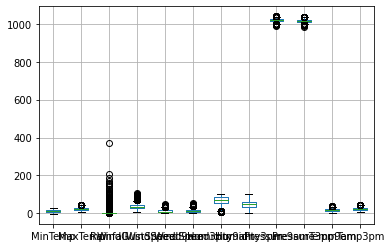

In [25]:
data.boxplot()



> Hist Plot



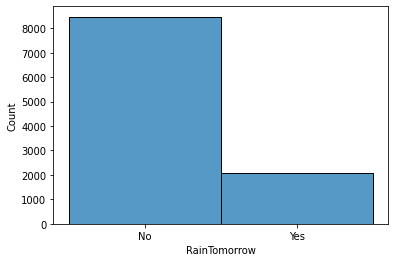

In [26]:
sb.histplot(data['RainTomorrow'])



> Scatter Plot



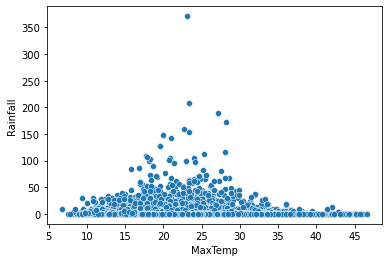

In [27]:
sb.scatterplot(data['MaxTemp'],data['Rainfall'])



> Distribution Plot



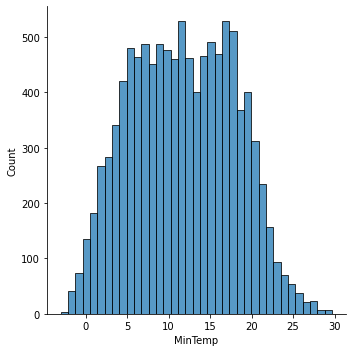

In [28]:
sb.displot(data['MinTemp'])

**6. Splitting The Dateset Into Dependent And Independent Variable**

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
data = data[data['RainTomorrow'].notnull()]

In [31]:
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)

In [32]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

In [33]:
set(y)

{'No', 'Yes'}

In [34]:
x=x.drop('Date',axis=1)

In [35]:
names=x.columns

In [36]:
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [37]:

sc=StandardScaler()

In [38]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [39]:
print(len(x),len(y))

10569 10569


**7. Label Encoding**

In [40]:
## RainToday	WindGustDir	WindDir9am	WindDir3pm

LE = LabelEncoder()
x['Location'] = LE.fit_transform(x['Location'])
x.head()

LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])
x.head()

LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])
x.head()

LE = LabelEncoder()
x['WindDir9am'] = LE.fit_transform(x['WindDir9am'])
x.head()

LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])
x.head()


,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,4,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,13,13,14
1,4,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,14,6,15
2,4,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,15,13,15
3,4,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,4,9,0
4,4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,13,1,7


In [41]:
LE = LabelEncoder()
y=pd.DataFrame(y)
y = LE.fit_transform(y)


In [42]:
print(len(x),len(y))

10569 10569


In [43]:
sc=StandardScaler()


In [44]:
x=sc.fit_transform(x)

In [45]:
x[:5]

array([[ 2.55982072,  0.27346239, -0.16513127, -0.18279804,  0.71188237,
         1.1876352 ,  1.10927826,  0.11821857, -1.20433933, -1.55951425,
        -1.27856152,  0.00616346, -0.12667267, -0.49455347,  1.02213952,
         1.06522714,  1.36394309],
       [ 2.55982072, -0.68840124,  0.14937868, -0.24553333,  0.71188237,
        -0.94899389,  0.84809113, -1.22638667, -1.06070178, -1.130583  ,
        -1.1731978 ,  0.0553409 ,  0.24267485, -0.49455347,  1.22865821,
        -0.4791633 ,  1.57889469],
       [ 2.55982072,  0.19330709,  0.23515413, -0.24553333,  0.87233365,
         1.05409588,  1.37046539, -1.52518783, -0.82130586, -1.57430498,
        -1.03773015,  0.67825522,  0.08016194, -0.49455347,  1.4351769 ,
         1.06522714,  1.57889469],
       [ 2.55982072, -0.39984215,  0.56395998, -0.24553333, -0.89263049,
        -0.01421867, -0.8496252 , -1.17658647, -1.49161443, -0.09523171,
        -0.42059976,  0.20287324,  0.56770067, -0.49455347, -0.83652868,
         0.18271832

In [46]:
x=pd.DataFrame(x,columns=names)

**8. Splitting The Data Into Train And Test**

In [47]:
from sklearn import model_selection

In [48]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

**9. Training And Testing The Model**

In [49]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
RFC=RandomForestClassifier()

In [51]:
GBC=GradientBoostingClassifier()

In [52]:
np.any(np.isnan(x))

False

In [53]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [54]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
data.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainTomorrow     False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [56]:
x.isnull().any()

Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [57]:
p1=RFC.predict(x_train)

In [58]:
p2=RFC.predict(x_test)

**10. Model Evaluation**

In [59]:
import sklearn.metrics as metrics



> Accuracy_score



In [60]:
print(metrics.accuracy_score(y_train,p1))

1.0


In [61]:
print(metrics.accuracy_score(y_test,p2))

0.869914853358562


**11. Save The Model**

In [62]:
import pickle

In [63]:
pickle.dump(RFC,open('rainfall.pkl','wb'))
pickle.dump(LE,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('imputer.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))